# Yelp Data Challenge 
## Part II - Clustering and PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('yelp_dataset/last_3_years_restaurant_reviews.csv')

In [3]:
df.head()

,Unnamed: 0,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,14,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,15,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,27,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [5]:
# Take the values of the column that contains review text data, save to a variable named "documents"
# removing na reviews
documents = df['text']
indx = pd.notnull(documents)
documents = documents[indx]
documents = documents.values
documents[:5]

array(["went for dinner tonight. Amazing my husband had lobster bisque and the T bone both were delish.I had the French onion soup and the pan seared duck. Cooked to perfection and I'm still raving about the flavor. If you are ever in Vegas this is a must try.",
       'This was an amazing dinning experience! ORDER THE PORK CHOP! I will definitely return.',
       "My husband and I went there for lunch on a Saturday. We had a physically exhausting week so we decided to treat ourselves. But it hasn't always been easy for our allergy whenever we ate out. So we called Delmonico ahead to see if they can accommodate our special needs. The lady who answered our call was very courteous and we felt comfortable to try after having some answers from her.\nAs we arrived, the restaurant has a comfortable ambience. I wouldn't say it is grand or special but just comfortable. When it was time to order, the server was courteous regarding our allergy too and I believe the one who took care of us was a 

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [6]:
# Make a column and take the values, save to a variable named "target"
df['is_pos_review'] = (df['stars']>4)
df['is_pos_review'].value_counts(normalize=True)

False    0.518158
True     0.481842
Name: is_pos_review, dtype: float64

In [7]:
# Make a column and take the values, save to a variable named "target"
target = df['is_pos_review'].values
target = target[indx]
target[:10]

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True])

In [8]:
indices = df.index

#### You may want to look at the statistic of the target variable

In [9]:
# To be implemented
documents.size,target.size

(558887, 558887)

In [10]:
target.mean()

0.4818415887290275

##### Get positive reviews for clustering

In [11]:
df_pos_reviews = df[df['is_pos_review']==True].copy()

In [12]:
df_pos_reviews.shape

(269295, 14)

In [13]:
documents_pos = df_pos_reviews['text']
indx2 = pd.notnull(documents_pos)
documents_pos = documents_pos[indx2]
documents_pos = documents_pos.values
documents_pos[:5]

array(["went for dinner tonight. Amazing my husband had lobster bisque and the T bone both were delish.I had the French onion soup and the pan seared duck. Cooked to perfection and I'm still raving about the flavor. If you are ever in Vegas this is a must try.",
       'This was an amazing dinning experience! ORDER THE PORK CHOP! I will definitely return.',
       "My husband and I went there for lunch on a Saturday. We had a physically exhausting week so we decided to treat ourselves. But it hasn't always been easy for our allergy whenever we ate out. So we called Delmonico ahead to see if they can accommodate our special needs. The lady who answered our call was very courteous and we felt comfortable to try after having some answers from her.\nAs we arrived, the restaurant has a comfortable ambience. I wouldn't say it is grand or special but just comfortable. When it was time to order, the server was courteous regarding our allergy too and I believe the one who took care of us was a 

In [14]:
target_pos = df_pos_reviews['is_pos_review'].values
target_pos = target_pos[indx2]
target_pos[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [15]:
ind_pos = df_pos_reviews.index

### Create training dataset and test dataset

In [16]:
from sklearn.cross_validation import train_test_split

/Users/jieluo/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents_train,documents_test,target_train,target_test,indices_train,indices_test = train_test_split(documents,target,indices,test_size=0.2, random_state=0)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,min_df=1)

In [20]:
# Train the model with your training data
X_train = vectorizer.fit_transform(documents_train).toarray()

In [21]:
# Get the vocab of your tfidf
features_name = vectorizer.get_feature_names()

In [22]:
# Use the trained model to transform test
X_test = vectorizer.transform(documents_test).toarray()

In [23]:
# Use the trained model to transform all the reviews
X_all = vectorizer.transform(documents).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [24]:
# To be implemented
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [25]:
# To be implemented
assigned_cluster_train = kmeans.predict(X_train)
assigned_cluster_test = kmeans.predict(X_test)
assigned_cluster_all = kmeans.predict(X_all)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [26]:
# To be implemented
print("cluster centers:")
print(kmeans.cluster_centers_)

cluster centers:
[[0.00319144 0.01038693 0.00231909 ... 0.0019165  0.0031673  0.00566268]
 [0.00076087 0.00436777 0.00151902 ... 0.0010408  0.00278107 0.00700504]]


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [27]:
# To be implemented
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features_name[i] for i in centroid)))

top features for each cluster:
0: good, food, place, like, just, time, ordered, order, chicken, really
1: great, food, service, place, amazing, good, best, love, friendly, vegas


#### Try different k
If you set k == to a different number, how does the top features change?

In [28]:
# To be implemented
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=5,random_state=42)
kmeans2.fit(X_train)
assigned_cluster_train2 = kmeans2.predict(X_train)
assigned_cluster_test2 = kmeans2.predict(X_test)

In [29]:
assigned_cluster_all2 = kmeans2.predict(X_all)

In [30]:
# To be implemented
top_centroids = kmeans2.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features_name[i] for i in centroid)))

top features for each cluster:
0: food, order, time, just, service, minutes, like, came, didn, place
1: pizza, crust, good, place, great, cheese, slice, best, order, just
2: great, food, service, place, amazing, good, friendly, staff, love, definitely
3: sushi, rolls, place, roll, ayce, great, good, fresh, service, fish
4: good, place, food, chicken, like, best, vegas, delicious, really, just


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

##### Rating and reveiw of random sample using n_clusters = 2

In [32]:
# To be implemented
for i in range(kmeans.n_clusters):
    cluster = indices_test[assigned_cluster_test==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print("cluster %d:" % i)
    for review in sample_reviews:
        print("rating: %f" % df.loc[review]['stars'])
        print("       %s" % df.loc[review]['text'])

cluster 0:
rating: 5.000000
       Me and 3 friends came on Valentine's Day so it was B U S Y.  We checked in and were told it was going to be an hour wait. We still waited because I love Hot n Juicy. Because they're so great, and we didn't even wait an hour! We were seated in about 25 minutes. Despite the restaurant being so busy, we were served quickly. Mason made sure we had all of our orders correct and served us quickly and efficiently.
rating: 1.000000
       The best thing was the chips and salsa. I ordered a shrimp cocktail and it tasted very fishy and BAD (like the shrimp was bad). I only had 2-3 bites at most, and they charged me full price for it. Very bad customer service. Fast forward 12 hours. I'm SICK SICK SICK SICK violently throwing up and cannot hold anything down. I'll spare you the details of the whole food poisioning expirence, but trust me it was 2 days of HELL! THESE GUYS WON'T BE IN BUSINESS LONG WITH THEIR BAD FOOD HANDLING PRACTICE AND LACK OF CUSTOMER SERVICE

##### Rating and reveiw of random sample using n_clusters=5

In [35]:
# To be implemented
for i in range(kmeans2.n_clusters):
    cluster = indices[assigned_cluster_all2==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print("cluster %d:" % i)
    for review in sample_reviews:
        print("rating: %f" % df.loc[review]['stars'])
        print("       %s" % df.loc[review]['text'])

cluster 0:
rating: 2.000000
       When you think of all the people that brought their traditions and recipes over from Mexico, you have to wonder if they ever envisioned them being desecrated by the man that brought you donkey sauce. 

As you enter you can feel the lard in the air. The skull decals and tattoo designs lining the walls makes you want to dress like you're in "Sons of Anarchy" while you dine here, although you come out lookin like "Wild Hogs."

On your way to the table you pass the Fieri gift shop, where you can stock up on all the great Guy swag and tribal bowling shirts. Your man cave will be lookin' fly when you get that flame print cutting board you always wanted.

I don't think any item here can be made delicious by paying $2 extra to have it "Changa'd"
But I figured why not go for it, I mean. Guy Fieri is a celebrity chef, his restaurant must have cuisine on par with the likes of other Food Network greats. 

Boy was I wrong, but I guess I wasn't aware nacho cheese s

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [38]:
df['review_cnt'] = df.groupby(['business_id'])['review_id'].transform('count')
df['review_cnt'].quantile(q=[0.5,0.75,0.90])

0.50     292.0
0.75     609.0
0.90    1289.0
Name: review_cnt, dtype: float64

In [39]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
df_top_restaurant = df[df['review_cnt']== df['review_cnt'].max()].copy()

In [40]:
df_top_restaurant['business_id'].value_counts()

RESDUcs7fIiihp38-d6_6g    4227
Name: business_id, dtype: int64

In [41]:
df_top_restaurant.shape

(4227, 15)

### Vectorize the text feature

In [42]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [43]:
# To be implemented
df_top_restaurant['is_pos_review'] = (df_top_restaurant['stars']>4)
df_top_restaurant['is_pos_review'].value_counts(normalize=True)
target_top_restaurant = df_top_restaurant['is_pos_review'].values

#### Check the statistic of the target variable

In [44]:
# To be implemented
target_top_restaurant.shape,documents_top_restaurant.shape

((4227,), (4227,))

In [45]:
indices_top_restaurant = df_top_restaurant.index

### Create training dataset and test dataset

In [46]:
from sklearn.cross_validation import train_test_split

In [47]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
doc_top_train,doc_top_test,tar_top_train,tar_top_test,ind_top_train,ind_top_test = train_test_split(documents_top_restaurant,target_top_restaurant,indices_top_restaurant,test_size=0.3,random_state=0)

### Get NLP representation of the documents

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
# Create TfidfVectorizer, and name it vectorizer
top_vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,min_df=1)

In [50]:
# Train the model with your training data
X_train_top=top_vectorizer.fit_transform(doc_top_train).toarray()

In [51]:
# Get the vocab of your tfidf
top_features_name = top_vectorizer.get_feature_names()

In [52]:
# Use the trained model to transform the test data
X_test_top=top_vectorizer.transform(doc_top_test).toarray()

In [53]:
# Use the trained model to transform all the data
X_all_top=top_vectorizer.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [54]:
# To be implemented
from sklearn.cluster import KMeans
kmeans_top = KMeans(n_clusters=2,random_state=42)
kmeans_top.fit(X_train_top)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [55]:
# To be implemented
assigned_cluster_all_top = kmeans_top.predict(X_all_top)

#### Inspect the centroids

In [56]:
# To be implemented
print("cluster centers:")
print(kmeans_top.cluster_centers_)

cluster centers:
[[0.00412316 0.00798633 0.00248271 ... 0.00946455 0.00261443 0.00531457]
 [0.00368822 0.01001068 0.00309549 ... 0.00552936 0.0018602  0.00306911]]


#### Find the top 10 features for each cluster.

In [57]:
# To be implemented
top_centroids = kmeans_top.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(top_features_name[i] for i in centroid)))

top features for each cluster:
0: crab, buffet, good, legs, food, seafood, dessert, section, really, like
1: food, buffet, vegas, best, wait, great, line, time, place, worth


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [58]:
# To be implemented
for i in range(kmeans_top.n_clusters):
    cluster = indices_top_restaurant[assigned_cluster_all_top==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print("cluster %d:" % i)
    for review in sample_reviews:
        print("rating: %f" % df_top_restaurant.loc[review]['stars'])
        print("       %s" % df_top_restaurant.loc[review]['text'])

cluster 0:
rating: 5.000000
       ****REVIEW #100 for ME!****

Decided to review Bacchanal Buffet because it's a well known spot in Vegas and considered one of best buffets out there. Was here with some buddies for a bachelor party. I had been here before but never for dinner buffet. It was a busy Saturday so there was a bit of a line around 8pm. 

Price for dinner buffet including gratuity for our party was $74! It's a hefty price tag. Depends on who you ask if they feel it's overpriced or not. But it's Vegas go big or go home!! 

Personally, I think based on the selection of seafood, meats, BBQs and dessert they serve it relatively appropriate and customers flow in constantly. I think to really made the dinner buffet worth it you gotta go with the seafood and BBQ and meats item which seem to be what separates Bacchanal from other buffets. Must try items were the crab legs, the bone marrow, the BBQ ribs and the WAGYU beef! Lines get really long for the meats sections and it's underst

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [59]:
from sklearn.preprocessing import StandardScaler

# To be implemented
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

### Use PCA to transform data (train and test) and get princial components

In [60]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_col = 50

# To be implemented
pca = PCA(n_components = n_col)

train_components = pca.fit_transform(X_scaled_train)# fit: get V, lambda; transform: X_train*V
test_components = pca.transform(X_scaled_test)


In [61]:
print(train_components.shape)
print(test_components.shape)

(447109, 50)
(111778, 50)


In [62]:
print(pca.components_.shape)

(50, 1000)


### See how much (and how much percentage of) variance the principal components explain

In [63]:
# To be implemented
print(pca.explained_variance_.shape)
print(pca.explained_variance_)

(50,)
[5.44949445 4.36027039 3.28665221 2.86361622 2.7060135  2.66256671
 2.51776147 2.42470179 2.30138623 2.27090322 2.24367682 2.12989089
 2.11111844 2.03479102 1.98201076 1.97620187 1.92747842 1.88558875
 1.84446277 1.83346969 1.81867101 1.76686287 1.75945618 1.72655534
 1.67992611 1.65149392 1.62632919 1.6152286  1.60015472 1.59856922
 1.56571163 1.55814295 1.52358329 1.52002694 1.50963869 1.48614478
 1.48056364 1.47003628 1.46104664 1.45534667 1.43668343 1.41247759
 1.40010519 1.3883012  1.36145716 1.3489329  1.32974109 1.32673088
 1.3216454  1.30829543]


In [64]:
# To be implemented
print(pca.explained_variance_ratio_.shape)
print(pca.explained_variance_ratio_)

(50,)
[0.00544948 0.00436026 0.00328664 0.00286361 0.00270601 0.00266256
 0.00251776 0.0024247  0.00230138 0.0022709  0.00224367 0.00212989
 0.00211111 0.00203479 0.00198201 0.0019762  0.00192747 0.00188558
 0.00184446 0.00183347 0.00181867 0.00176686 0.00175945 0.00172655
 0.00167992 0.00165149 0.00162633 0.00161522 0.00160015 0.00159857
 0.00156571 0.00155814 0.00152358 0.00152002 0.00150964 0.00148614
 0.00148056 0.00147003 0.00146104 0.00145534 0.00143668 0.00141247
 0.0014001  0.0013883  0.00136145 0.00134893 0.00132974 0.00132673
 0.00132164 0.00130829]


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

In [65]:
# To be implemented
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Text(0,0.5,u'Variance Explained')

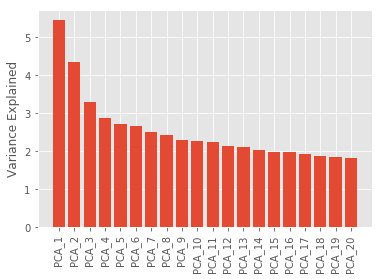

In [66]:
# To be implemented
pca_range = np.arange(20) + 1
explained_var_top20 = pca.explained_variance_[:20]

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, explained_var_top20, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Variance Explained')

Text(0,0.5,u'Proportion of Variance Explained')

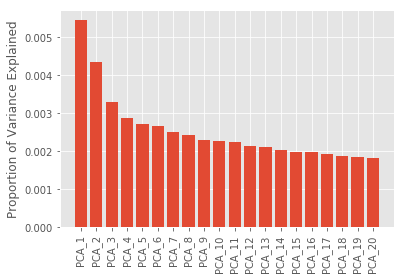

In [67]:
# To be implemented
pca_range = np.arange(20) + 1
explained_var_top20 = pca.explained_variance_ratio_[:20]

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, explained_var_top20, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Proportion of Variance Explained')

## Classifying positive/negative review with PCA preprocessing

### Helper Function

In [71]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,roc_auc_score

In [72]:
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [73]:
#helper function to plot roc curve
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [74]:
# helper function to train models
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [75]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

# To be implemented
clf_lrc = LogisticRegression()

clf_lrc.fit(X_scaled_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.904200  0.903739
Accuracy   0.823215  0.822988
Precision  0.808597  0.810161
Recall     0.829105  0.827591
f1-score   0.818723  0.818783


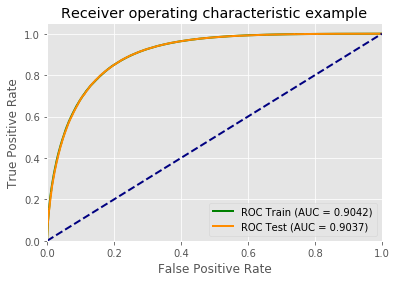

In [76]:
# Get score for training set & test set
train_test_model(clf_lrc, X_scaled_train, target_train, X_scaled_test, target_test)

#### Use (Stardardized + PCA) tf-idf vectors as features

In [77]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

# To be implemented
clf_lrc_pca = LogisticRegression()

clf_lrc_pca.fit(X_scaled_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.885704  0.887447
Accuracy   0.804511  0.807073
Precision  0.790776  0.795028
Recall     0.807705  0.809409
f1-score   0.799151  0.802154


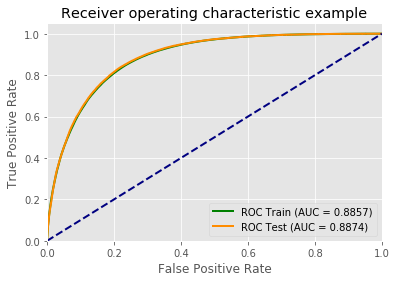

In [78]:
# Get score for training set & test set
train_test_model(clf_lrc_pca, train_components, target_train, test_components, target_test)

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

##### Answer: 
1. In terms of running time, when using PCA preprocessing features to fit logistic model, it's much faster than non-PCA ones. The reason is that some data information is missing after PCA processing.
2. In terms of scores(metrics), the PCA ones has lower scores. Comparing the difference between train score and testing score, PCA results has larger gap between test and train. One way to explain is that the model is likely to be overfitting, and thus larger gap between training metric and testing metric. 

#### You can plot the coefficients against principal components


In [79]:
# To be implemented
clf_lrc_pca.coef_[0]

array([-0.67206213, -0.07824163,  0.40076587, -0.17196298,  0.07222961,
       -0.46158514, -0.32503299, -0.21122412, -0.01796515,  0.37864863,
        0.22256784,  0.02463258,  0.15726432,  0.06183755,  0.03726377,
        0.10406515, -0.14620519, -0.05435257,  0.01127462, -0.01166082,
       -0.03173802, -0.18083171,  0.13935733, -0.14861146,  0.05562675,
       -0.1181244 , -0.03652565, -0.11001932,  0.06335989, -0.01939466,
        0.0245199 ,  0.00662704,  0.04850324,  0.03447571,  0.03201706,
       -0.04455202, -0.13576835,  0.03437658, -0.01542787,  0.09158055,
        0.08172503,  0.08835832,  0.05439852,  0.01858375,  0.0266826 ,
        0.02069214, -0.03355266, -0.06119798,  0.08717128,  0.01885849])

Text(0,0.5,u'Coefficients')

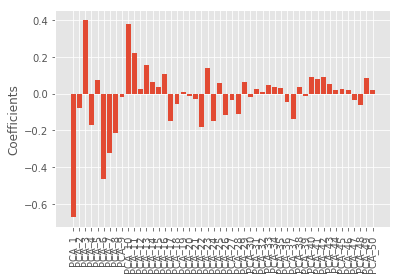

In [80]:
# To be implemented
pca_range = np.arange(50) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, clf_lrc_pca.coef_[0], align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Coefficients')

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [81]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
clf_rfc = RandomForestClassifier(max_depth=20, n_estimators=10, min_samples_leaf=100)

clf_rfc.fit(X_scaled_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.855203  0.851532
Accuracy   0.776426  0.774929
Precision  0.766335  0.766393
Recall     0.770656  0.768436
f1-score   0.768490  0.767413


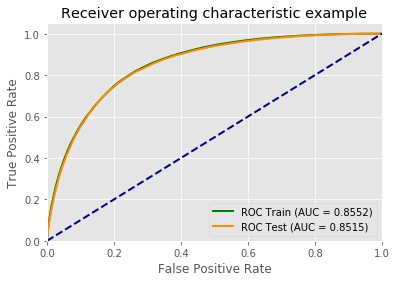

In [82]:
# Get score for training set & test set
train_test_model(clf_rfc, X_scaled_train, target_train, X_scaled_test, target_test)

#### Use (Stardardized + PCA) tf-idf vectors as features

In [83]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
clf_rfc_pca = RandomForestClassifier(max_depth=20, n_estimators=10, min_samples_leaf=100)

clf_rfc_pca.fit(train_components, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.886250  0.868011
Accuracy   0.800013  0.784895
Precision  0.788207  0.775508
Recall     0.799483  0.780878
f1-score   0.793805  0.778184


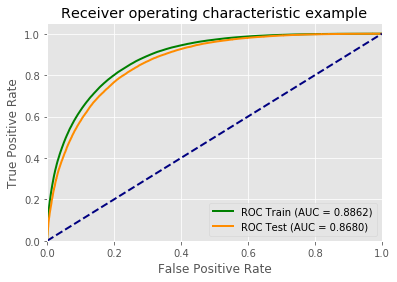

In [84]:
# Get score for training set & test set
train_test_model(clf_rfc_pca, train_components, target_train, test_components, target_test)

#### Q: What do you see from the training result and the test result?

##### Answer: 
1. In terms of running time, when using PCA preprocessing features to fit logistic model, it's much faster than non-PCA ones. The reason is that some data information is missing after PCA processing.
2. In terms of scores(metrics), the PCA ones has higher scores. Comparing the difference between train score and testing score, PCA results has larger gap between test and train. One way to explain is that the model is likely to be overfitting, and thus larger gap between training metric and testing metric.

#### You can plot the feature importances against principal components


In [85]:
# To be implemented
clf_rfc_pca.feature_importances_

array([0.41269456, 0.02989592, 0.08871885, 0.02757147, 0.01095489,
       0.1143353 , 0.05022097, 0.0312899 , 0.00807559, 0.06345696,
       0.01911769, 0.00290746, 0.00861363, 0.00447761, 0.00290958,
       0.00904642, 0.00578622, 0.00473921, 0.00333476, 0.00308537,
       0.00422307, 0.01439896, 0.00711131, 0.00886146, 0.00315346,
       0.00339733, 0.00227126, 0.00473706, 0.00204406, 0.00353083,
       0.00326579, 0.00181067, 0.00357608, 0.00252898, 0.00291354,
       0.00182909, 0.00457718, 0.00179598, 0.00158494, 0.00285298,
       0.0021624 , 0.00210432, 0.00218971, 0.00148379, 0.00137781,
       0.00146035, 0.00132458, 0.00286669, 0.00219398, 0.00113999])

Text(0,0.5,u'feature importance')

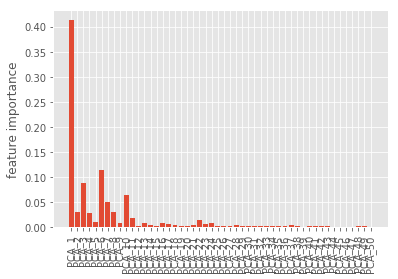

In [86]:
pca_range = np.arange(50) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, clf_rfc_pca.feature_importances_, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('feature importance')